# Math 104B HW 7

## Qingze Lan   3046380

In [1]:
from numpy import zeros, linspace, sin, dot, concatenate
from numpy.linalg import norm
from time import time
from math import pi
from pandas import DataFrame
import matplotlib.pyplot as plt

### Problem 1

The search directions in the steepest descent method are given by: $v^{(k)} = -\nabla J(x^{(k)}) = b - Ax^{(k)} = r^{(k)}$. 

The optimal step length in each step is given by:
$$t_k = \frac{\langle r^{(k)},r^{(k)}\rangle}{\langle r^{(k)},Ar^{(k)}\rangle}$$
Then, for consecutive search directions one has:

$$\langle v^{(k+1)}, v^{(k)}\rangle = \langle r^{(k+1)},r^{(k)}\rangle = \langle b-Ax^{(k+1)},r^{(k)}\rangle = \langle 
r^{(k)} - t_kAr^{(k)},r^{(k)}\rangle = \langle r^{(k)},r^{(k)}\rangle - t_k \langle r^{(k)}, Ar^{(k)}\rangle =0$$

because of the formula for $t_k$ and because $x^{(k+1)} = x^{(k)} + t_kr^{k}$.

### Problem 2

We'll consider the Krylov subspace $\mathcal{K}_k(r^{(0)},A) = \text{span}\{r^{(0)},\ldots,r^{(k-1)}\}$. We know that 

$$\text{span}\{r^{(0)},\ldots,r^{(k-1)}\}=\text{span}\{v^{(0)},\ldots,v^{(k-1)}\}$$

Also:

$$\text{span}\{r^{(0)},\ldots,r^{(k)}\}=\text{span}\{v^{(0)},\ldots,v^{(k)}\}$$ 

but since $v^{(k)} = 0$ 

we have:

$$\text{span}\{r^{(0)},\ldots,r^{(k-1)}\}=\text{span}\{r^{(0)},\ldots,r^{(k)}\}$$ 

and then $r^{(k)}\in\mathcal{K}_k(r^{(0)},A)$. But since all the residuals in the conjugate gradient method are orthogonal and thus linearly independent it has to be $r^{(k)} = 0\implies Ax^{(k)} = b$.

### Problem 3

Given that 

$$\frac{-v_{j-1}+2v_j-v_{j+1}}{h^2}+\pi^2v_j = 2\pi^2\sin(\pi x_j),\;\;\; j = 1,\ldots,N-1$$

Equivalently:

$$\frac{1}{2\pi^2h^2}\begin{bmatrix}
    2+h^2\pi^2 & -1 & 0   & \dots  & 0   \\
     -1 &    2+h^2\pi^2    & -1   & \dots  & 0   \\
     0 &      \ddots   & \ddots & \ddots    & \vdots    \\
      \vdots &         &  &    & \vdots    \\
      &         &      -1     &     2+h^2\pi^2    & -1   \\
      0&         &        0   &      -1     & 2+h^2\pi^2 \\
  \end{bmatrix}\begin{bmatrix}
  v_1 \\
  v_2 \\
 \vdots \\
 \\\vdots \\
 v_{N-1}\\
  \end{bmatrix} = \begin{bmatrix}
  \sin(\pi x_1) \\
  \sin(\pi x_2)\\
 \vdots \\
 \\\vdots \\
 \sin(\pi x_{N-1})\\
  \end{bmatrix}$$
  
We'll implement the conjugate gradient method to find an approximated solution to the BVP problem using a grid of $N+1$ points for $N=50,100,200$.

In [2]:
# Product Ax for A tridiagonal
# INPUT: x
# OUTPUT: Ax
# Qingze Lan
# 03/10/2021

def A_dot(A,x):
    Ax = zeros(x.size)
    Ax[0] = A[0,0]*x[0] + A[0,1]*x[1]
    Ax[-1] = A[-1,-1]*x[-1] + A[-1,-2]*x[-2]
    for i in range(1,len(Ax) - 1):
        Ax[i] = A[i,i-1]*x[i-1] + A[i,i]*x[i] + A[i,i+1]*x[i+1]
    return Ax

# Defining matrix of BVP problem
# INPUT: N
# OUTPUT: A (matrix)
# Qingze Lan
# 03/10/2021

def bvp_A(N):
    h = 1/N
    A = zeros((N - 1, N - 1))
    for i in range(0, N - 1):
        A[i,i] = 2 + h**2*pi**2
        if i > 0:
            A[i, i - 1] = -1
            A[i - 1, i] = -1
    A *= 1/2/h**2/pi**2
    return A

# Conjugate gradient method with zero vector as initial guess
# for the linear system above
# INPUT: N
# OUTPUT: v (approximated solution)
# Qingze Lan
# 03/10/2021

def conj_grad(N):
    tic = time()
    TOL = N**(-2)
    x = zeros(N - 1)
    b = sin( pi*linspace(0,1,N+1)[1:-1] )
    A = bvp_A(N)
    adot = lambda y: A_dot(A,y)
    r = b - adot( x )
    v = r
    k = 0
    while norm(r) > TOL: # at most N - 1 iterations
        av = adot(v)
        t = dot(r,r)/dot(v,av)
        x += t*v
        r_p = r.copy()
        r -= t*av
        s = dot(r,r)/dot(r_p,r_p)
        v *= s
        v += r
        k += 1
    print('Solution found in %i iterations for N = %i' % (k,N))
    print('TIME: %.15f s' % (time() - tic))
    return x

Solution found in 1 iterations for N = 50
TIME: 0.005520820617676 s
Solution found in 1 iterations for N = 100
TIME: 0.000665187835693 s
Solution found in 1 iterations for N = 200
TIME: 0.003356933593750 s


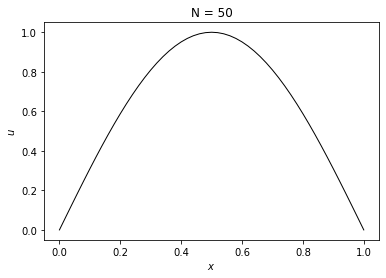

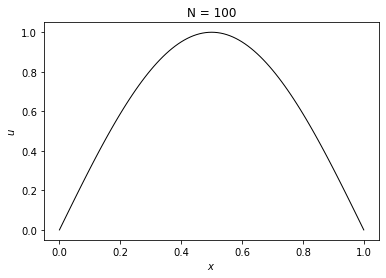

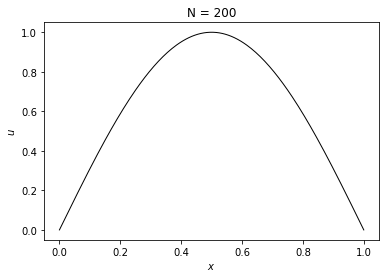

,$N$,Error
0,50,0.000822
1,100,0.000291
2,200,0.000103


In [3]:
# Finding solutions conjugate gradient method
n = [50,100,200]

x = [linspace(0,1,N + 1) for N in n]
u = [sin(pi*y) for y in x]
v = [concatenate([[0],conj_grad(N),[0]]) for N in n]
errors = []

for i in range(0,len(n)):
    errors.append(norm(u[i]-v[i]))
    plt.plot(x[i],v[i], color = 'black', linewidth = 1)
    plt.title('N = %i' % n[i])
    plt.xlabel('$x$')
    plt.ylabel('$u$')
    plt.show()

data = {'$N$':n, 'Error': errors}
DataFrame(data)

In the three cases only 1 iteration is needed for a good enough approximation. We set the tolerance to be $h^2$ since this is the order of the error we make when discretizing the BVP problem. Also this error is expected to be $O(h^2)$. When doubling the value of $N$ we should expect the error to becomes four times smaller. The result is slightly worse than this.

We can compare it with the performance of Jacobi's method.

In [4]:
# Jacobi's method for the bvp problem above
# with initial guess 0 vector
# INPUT: N
# OUTPUT: v (approximated solution)
# Qingze Lan
# 03/10/2021

def jacobi(N):
    tic = time()
    A = bvp_A(N)
    TOL = N**(-2)
    adot = lambda y: A_dot(A,y)
    x = zeros(N - 1)
    b = sin(pi*linspace(0,1,N + 1)[1:-1])
    k = 0
    kmax = 1e6 # max number of iterations
    while norm(b - adot(x)) > TOL and k < kmax:
        x[0] = (b[0] - A[0,1]*x[1])/A[0,0]
        x[-1] = (b[-1] - A[-1,-2]*x[-2])/A[-1,-1]
        for i in range(1, len(x) - 1):
            x[i] = (b[i] - A[i,i - 1]*x[i - 1] - A[i,i + 1]*x[i + 1])/A[i,i]
        k += 1
    print('Solution found in %i iterations for N = %i' % (k,N))
    print('TIME: %.15f s' % (time() - tic))
    return x

Solution found in 1196 iterations for N = 50
TIME: 0.225564718246460 s
Solution found in 5659 iterations for N = 100
TIME: 1.753199100494385 s
Solution found in 26141 iterations for N = 200
TIME: 16.590779066085815 s


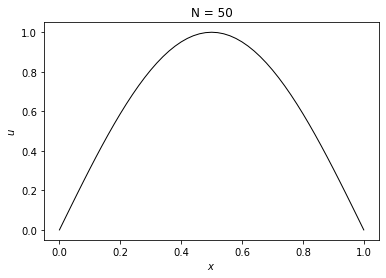

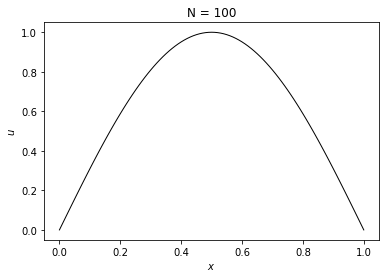

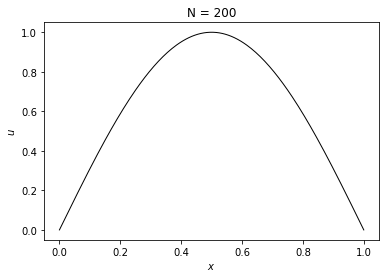

,$N$,Error
0,50,0.000425
1,100,0.000191
2,200,0.000078


In [5]:
# Finding solutions Jacobi's method
n = [50,100,200]

x = [linspace(0,1,N + 1) for N in n]
u = [sin(pi*y) for y in x]
v = [concatenate([[0],jacobi(N),[0]]) for N in n]
errors = []

for i in range(0,len(n)):
    errors.append(norm(u[i]-v[i]))
    plt.plot(x[i],v[i], color = 'black', linewidth = 1)
    plt.title('N = %i' % n[i])
    plt.xlabel('$x$')
    plt.ylabel('$u$')
    plt.show()

data = {'$N$':n, 'Error': errors}
DataFrame(data)

Therefore, both methods arrive to approximations to the exact solutions. 
However, the performance of the conjugate gradient method is considerably better.